# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

In [39]:
cities

['mataura',
 'kahului',
 'bathsheba',
 'ilo',
 'kapaa',
 'tumannyy',
 'streator',
 'taolanaro',
 'port elizabeth',
 'illoqqortoormiut',
 'rikitea',
 'san cristobal',
 'tuktoyaktuk',
 'kati',
 'butaritari',
 'punta arenas',
 'albany',
 'castro',
 'walvis bay',
 'bambous virieux',
 'pareora',
 'isla vista',
 'talnakh',
 'rungata',
 'svetlaya',
 'guerrero negro',
 'nuuk',
 'aklavik',
 'kodiak',
 'busselton',
 'puerto ayora',
 'carnarvon',
 'muli',
 'east london',
 'smithers',
 'havre-saint-pierre',
 'attawapiskat',
 'new norfolk',
 'saskylakh',
 'harnosand',
 'saint-pierre',
 'belushya guba',
 'alofi',
 'isangel',
 'daru',
 'nanortalik',
 'samusu',
 'haibowan',
 'tuatapere',
 'ushuaia',
 'richards bay',
 'quezaltepeque',
 'vao',
 'ilulissat',
 'russell',
 'cabo san lucas',
 'hobart',
 'bonavista',
 'lavrentiya',
 'lompoc',
 'tasiilaq',
 'san ramon',
 'norman wells',
 'vaini',
 'kavieng',
 'halifax',
 'kaitangata',
 'manosque',
 'gurgentepe',
 'grand river south east',
 'hofn',
 'hilo',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
citys = []
count = 1
count_set = 1 

weather_by_city =""

for i, city in enumerate(cities):
        
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    print("Processing record %s of set %s | %s " % (count, count_set, city))
    
    count += 1 
    
    try:
            weather_by_city = requests.get(query_url + city).json()

            lat_data = weather_by_city["coord"]["lat"]
            lng_data = weather_by_city["coord"]["lon"]
            max_data = weather_by_city["main"]["temp_max"]
            hum_data = weather_by_city["main"]["humidity"]
            cloud_data = weather_by_city["clouds"]["all"]
            wind_data = weather_by_city["wind"]["speed"]
            country_data = weather_by_city["sys"]["country"]
            date_data = weather_by_city["dt"]

            citys.append({"city":city, "lat":lat_data, "lng":lng_data, "max temperature":max_data, "humid":hum_data, 
                     "clouds":cloud_data, "wind speed":wind_data, "country": country_data, "date":date_data})

            if (i%50 == 0 and i>=50):
                count_set +=1
                count = 0

    except:
            print("not found. skipped")
            pass


Processing record 1 of set 1 | mataura 
Processing record 2 of set 1 | kahului 
Processing record 3 of set 1 | bathsheba 
Processing record 4 of set 1 | ilo 
Processing record 5 of set 1 | kapaa 
Processing record 6 of set 1 | tumannyy 
not found. skipped
Processing record 7 of set 1 | streator 
Processing record 8 of set 1 | taolanaro 
not found. skipped
Processing record 9 of set 1 | port elizabeth 
Processing record 10 of set 1 | illoqqortoormiut 
not found. skipped
Processing record 11 of set 1 | rikitea 
Processing record 12 of set 1 | san cristobal 
Processing record 13 of set 1 | tuktoyaktuk 
Processing record 14 of set 1 | kati 
Processing record 15 of set 1 | butaritari 
Processing record 16 of set 1 | punta arenas 
Processing record 17 of set 1 | albany 
Processing record 18 of set 1 | castro 
Processing record 19 of set 1 | walvis bay 
Processing record 20 of set 1 | bambous virieux 
Processing record 21 of set 1 | pareora 
Processing record 22 of set 1 | isla vista 
Process

In [59]:
citys

[{'city': 'mataura',
  'lat': -46.19,
  'lng': 168.86,
  'max temperature': 45.94,
  'humid': 66,
  'clouds': 80,
  'wind speed': 7.56,
  'country': 'NZ',
  'date': 1570309363},
 {'city': 'kahului',
  'lat': 20.89,
  'lng': -156.47,
  'max temperature': 86,
  'humid': 58,
  'clouds': 20,
  'wind speed': 16.11,
  'country': 'US',
  'date': 1570309364},
 {'city': 'bathsheba',
  'lat': 13.22,
  'lng': -59.52,
  'max temperature': 86,
  'humid': 70,
  'clouds': 40,
  'wind speed': 23.04,
  'country': 'BB',
  'date': 1570309364},
 {'city': 'ilo',
  'lat': -17.65,
  'lng': -71.34,
  'max temperature': 62.6,
  'humid': 82,
  'clouds': 90,
  'wind speed': 10.29,
  'country': 'PE',
  'date': 1570309364},
 {'city': 'kapaa',
  'lat': 22.08,
  'lng': -159.32,
  'max temperature': 82.4,
  'humid': 74,
  'clouds': 40,
  'wind speed': 12.75,
  'country': 'US',
  'date': 1570309110},
 {'city': 'streator',
  'lat': 41.12,
  'lng': -88.84,
  'max temperature': 69.01,
  'humid': 68,
  'clouds': 90,
  'wi

In [60]:
weather_by_city

{'coord': {'lon': -0.54, 'lat': 53.23},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 53.46,
  'pressure': 1015,
  'humidity': 87,
  'temp_min': 52,
  'temp_max': 55.4},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 130},
 'clouds': {'all': 100},
 'dt': 1570309369,
 'sys': {'type': 1,
  'id': 1422,
  'message': 0.0074,
  'country': 'GB',
  'sunrise': 1570255790,
  'sunset': 1570296680},
 'timezone': 3600,
 'id': 2644487,
 'name': 'Lincoln',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
weather_df = pd.DataFrame(citys)
weather_df.head()

,city,clouds,country,date,humid,lat,lng,max temperature,wind speed
0,mataura,80,NZ,1570309363,66,-46.19,168.86,45.94,7.56
1,kahului,20,US,1570309364,58,20.89,-156.47,86.00,16.11
2,bathsheba,40,BB,1570309364,70,13.22,-59.52,86.00,23.04
3,ilo,90,PE,1570309364,82,-17.65,-71.34,62.60,10.29
4,kapaa,40,US,1570309110,74,22.08,-159.32,82.40,12.75


In [115]:
def f(row):
    if row['lat'] >= 0:
        val = 'northern'
    else: 
        val = 'southern'
    return val 

In [116]:
weather_df['hemi'] = weather_df.apply(f, axis=1)
weather_df.head()

,city,clouds,country,date,humid,lat,lng,max temperature,wind speed,hemi
0,mataura,80,NZ,1570309363,66,-46.19,168.86,45.94,7.56,southern
1,kahului,20,US,1570309364,58,20.89,-156.47,86.00,16.11,northern
2,bathsheba,40,BB,1570309364,70,13.22,-59.52,86.00,23.04,northern
3,ilo,90,PE,1570309364,82,-17.65,-71.34,62.60,10.29,southern
4,kapaa,40,US,1570309110,74,22.08,-159.32,82.40,12.75,northern


In [117]:
weather_df.to_csv('Desktop')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

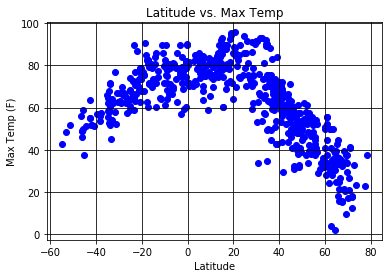

In [118]:
plt.scatter(weather_df["lat"],weather_df["max temperature"],color="b")
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.show()

#### Latitude vs. Humidity Plot

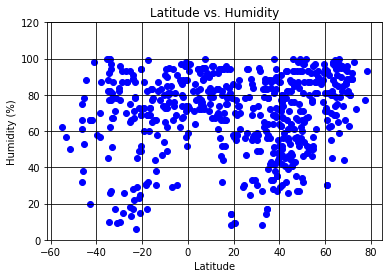

In [119]:
plt.scatter(weather_df["lat"],weather_df["humid"],color="b")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,120)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.show()

#### Latitude vs. Cloudiness Plot

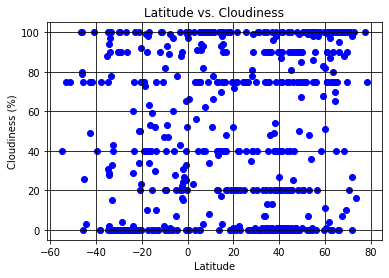

In [120]:
plt.scatter(weather_df["lat"],weather_df["clouds"],color="b")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.show()

#### Latitude vs. Wind Speed Plot

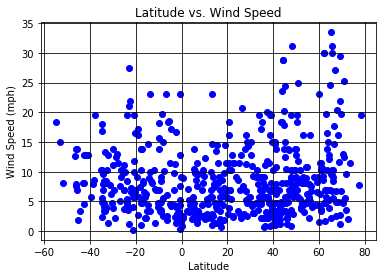

In [121]:
plt.scatter(weather_df["lat"],weather_df["wind speed"],color="b")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.show()

## Linear Regression

In [122]:
# OPTIONAL: Create a function to create Linear Regression plots


In [124]:
# Create Northern and Southern Hemisphere DataFrames
weather_df.head()

,city,clouds,country,date,humid,lat,lng,max temperature,wind speed,hemi
0,mataura,80,NZ,1570309363,66,-46.19,168.86,45.94,7.56,southern
1,kahului,20,US,1570309364,58,20.89,-156.47,86.00,16.11,northern
2,bathsheba,40,BB,1570309364,70,13.22,-59.52,86.00,23.04,northern
3,ilo,90,PE,1570309364,82,-17.65,-71.34,62.60,10.29,southern
4,kapaa,40,US,1570309110,74,22.08,-159.32,82.40,12.75,northern


In [126]:
north_df = weather_df.loc[weather_df['hemi'] == 'northern']
south_df = weather_df.loc[weather_df['hemi'] == 'southern']
north_df.head()

,city,clouds,country,date,humid,lat,lng,max temperature,wind speed,hemi
1,kahului,20,US,1570309364,58,20.89,-156.47,86.00,16.11,northern
2,bathsheba,40,BB,1570309364,70,13.22,-59.52,86.00,23.04,northern
4,kapaa,40,US,1570309110,74,22.08,-159.32,82.40,12.75,northern
5,streator,90,US,1570309091,68,41.12,-88.84,69.01,13.87,northern
6,port elizabeth,20,US,1570309365,44,39.31,-74.98,64.00,8.05,northern


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.83834566439273


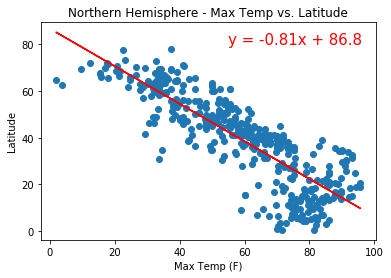

In [130]:
x_values = north_df['max temperature']
y_values = north_df['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,80),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7159793742885133


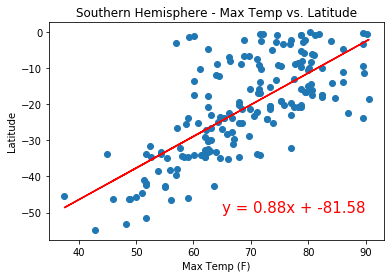

In [139]:
x_values = south_df['max temperature']
y_values = south_df['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(65,-50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07121293384040711


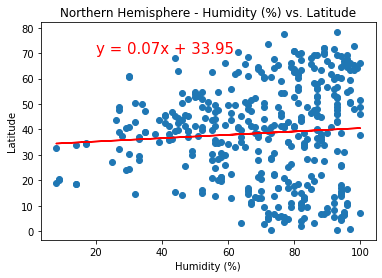

In [132]:
x_values = north_df['humid']
y_values = north_df['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,70),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18762898344444864


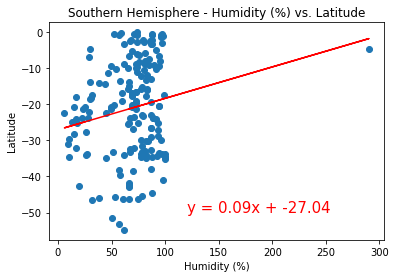

In [142]:
x_values = south_df['humid']
y_values = south_df['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(120,-50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06540142204959255


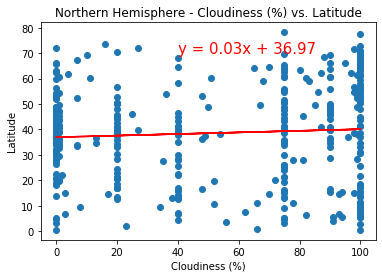

In [134]:
x_values = north_df['clouds']
y_values = north_df['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,70),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08330157943902419


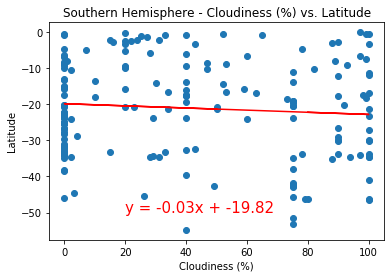

In [145]:
x_values = south_df['clouds']
y_values = south_df['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2657577437380838


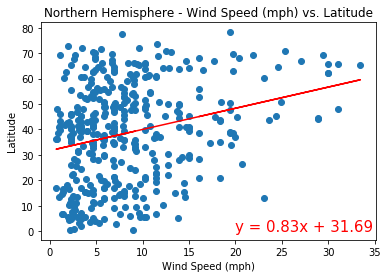

In [149]:
x_values = north_df['wind speed']
y_values = north_df['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.10928948328758722


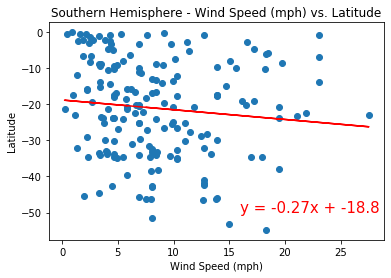

In [148]:
x_values = south_df['wind speed']
y_values = south_df['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,-50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")